In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import re
import random
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/6th semG..csv')

In [ ]:
col=['usn','gender','cg1','cg2','cg3','cg4','cg5']
data.columns=col

In [ ]:
data.shape

(166, 7)

In [ ]:
data.isnull().sum()

usn       0
gender    0
cg1       0
cg2       0
cg3       0
cg4       0
cg5       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   usn     166 non-null    object 
 1   gender  166 non-null    object 
 2   cg1     166 non-null    float64
 3   cg2     166 non-null    float64
 4   cg3     166 non-null    float64
 5   cg4     166 non-null    float64
 6   cg5     166 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.2+ KB


In [ ]:
data.head()

usn gender   cg1    cg2   cg3   cg4   cg5
0  1GA20CS002      M  8.33   8.84  7.63  7.58  7.96
1  1GA20CS003      M  6.33   7.00  6.92  7.29  7.65
2  1GA20CS004      M  7.48   8.21  7.79  7.00  8.00
3  1GA20CS005      M  9.43  10.00  9.50  9.29  9.35
4  1GA20CS006      M  4.12   0.00  1.25  1.63  2.39

In [ ]:
data.tail()

usn gender   cg1   cg2   cg3   cg4   cg5
161  1GA20CS170      F  8.20  8.37  8.21  8.17  9.13
162  1GA20CS171      M  8.86  8.84  7.71  8.25  7.26
163  1GA20CS172      M  6.49  6.16  3.50  4.80  6.70
164  1GA20CS173      F  9.43  9.63  9.13  9.42  9.04
165  1GA20CS174      F  7.00  6.79  7.13  7.67  7.91

**DATA PREPROCESSING**

In [ ]:
data=data.replace(to_replace=["nil","FAIL"],
           value=0)
data=data.replace(to_replace = np.nan, value =0)

In [ ]:
outlier = data[(data['cg1']>10) | (data['cg2']>10) | (data['cg3']>10) | (data['cg4']>10) | (data['cg5']>10) ]
print(type(outlier))
outlier

<class 'pandas.core.frame.DataFrame'>


usn gender   cg1   cg2   cg3   cg4     cg5
43  1GA20CS047      M  7.76  7.89  6.13  7.79  8017.0

In [ ]:
data=data.replace(to_replace=8017.0,value=8.17)

In [ ]:
outlier = data[(data['cg1']>10) | (data['cg2']>10) | (data['cg3']>10) | (data['cg4']>10) | (data['cg5']>10) ]
print(type(outlier))
outlier

<class 'pandas.core.frame.DataFrame'>


Empty DataFrame
Columns: [usn, gender, cg1, cg2, cg3, cg4, cg5]
Index: []

In [ ]:
df_less = data[(data['cg1']<1) | (data['cg2']<1) | (data['cg3']<1) | (data['cg4']<1) | (data['cg5']<1) ]
print(type(df_less))
df_less

<class 'pandas.core.frame.DataFrame'>


usn gender   cg1   cg2   cg3   cg4   cg5
4   1GA20CS006      M  4.12  0.00  1.25  1.63  2.39
8   1GA20CS010      M  5.27  5.32  2.50  0.96  3.30
27  1GA20CS030      M  4.60  2.95  0.83  3.17  0.00

In [ ]:
data.describe()

cg1         cg2         cg3         cg4         cg5
count  166.000000  166.000000  166.000000  166.000000  166.000000
mean     7.770000    8.236566    7.547048    7.993554    8.230301
std      1.430013    1.431966    1.707306    1.632147    1.454534
min      1.240000    0.000000    0.830000    0.960000    0.000000
25%      6.822500    7.592500    7.080000    7.470000    7.662500
50%      7.950000    8.630000    7.980000    8.480000    8.650000
75%      8.900000    9.305000    8.670000    9.117500    9.170000
max     10.000000   10.000000    9.880000   10.000000   10.000000

**DATA VISUALISATIONS**

<Axes: xlabel='usn', ylabel='Count'>

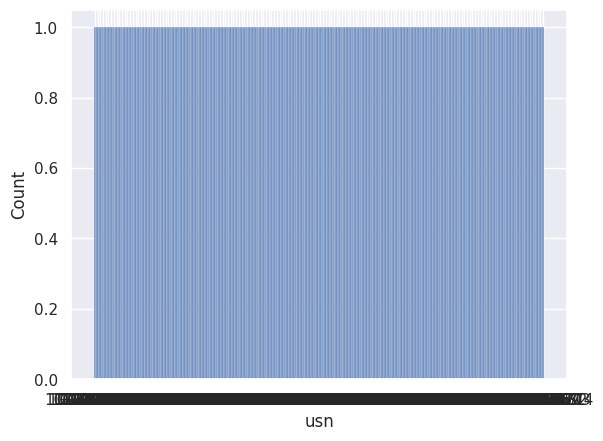

In [ ]:
sns.set_theme(style='darkgrid')
sns.histplot(data.usn)

<Axes: xlabel='cg1', ylabel='Count'>

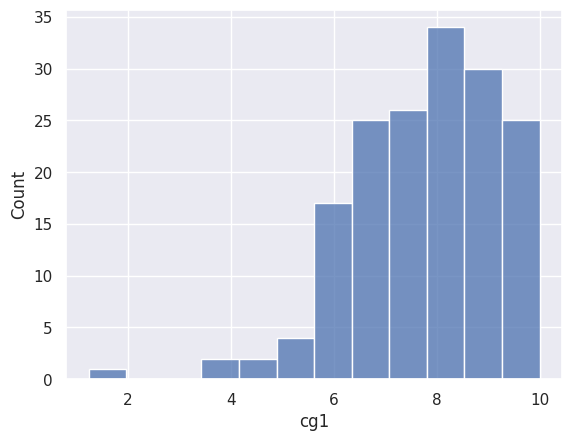

In [ ]:
sns.set_theme(style='darkgrid')
sns.histplot(data.cg1)

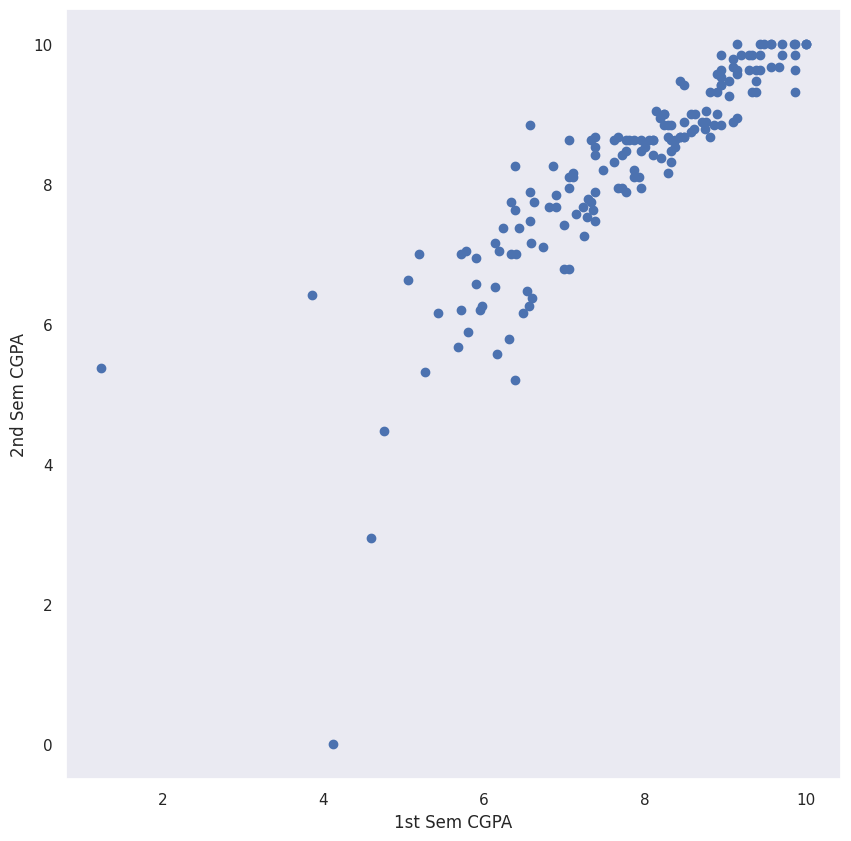

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(data['cg1'],data['cg2'])
plt.xlabel('1st Sem CGPA')
plt.ylabel('2nd Sem CGPA')

plt.grid()
plt.show()

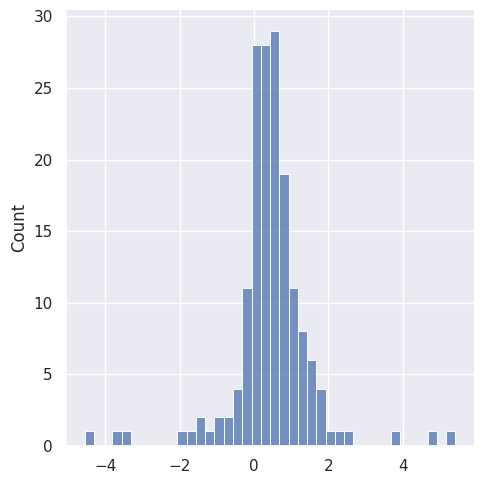

In [ ]:
sns.displot(data['cg4']- data['cg3'])

**BUIDING THE REGRESSION MODELS FOR PREDICTION **

In [ ]:
# importing Various regression algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

In [ ]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [ ]:
X = data.drop(['usn','gender','cg5'],axis=1)
y = data['cg5']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

In [ ]:
for model, name in zip([Las,LinR,Rid,Rfc,Dtc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid],
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    startr=time.time()
    model.fit(X_train,y_train)
    stopr=time.time()
    startt=time.time()
    predictions = model.predict(X_test)
    stopt=time.time()
    print(name)
    absolute=mean_absolute_error(y_test, predictions)
    squared=mean_squared_error(y_test, predictions)
    root=np.sqrt(mean_squared_error(y_test, predictions))
    r2=r2_score(y_test,predictions )
    train=stopr - startr
    test=stopt - startt
    print('Mean Absolute Error:', f"{absolute:.3f}")
    print('Mean Squared Error:',f"{squared:.3f}" )
    print('Root Mean Squared Error:', f"{root:.3f}")
    print('R2 : ',f"{r2:.3f}")
    print("Training time:" ,f"{train:.3f}")
    print("Testing time:" ,f"{test:.3f}")
    print()

Lasso
Mean Absolute Error: 0.714
Mean Squared Error: 0.646
Root Mean Squared Error: 0.804
R2 :  0.167
Training time: 0.011
Testing time: 0.002

Linear Regression
Mean Absolute Error: 0.546
Mean Squared Error: 0.393
Root Mean Squared Error: 0.627
R2 :  0.494
Training time: 0.053
Testing time: 0.002

Ridge
Mean Absolute Error: 0.542
Mean Squared Error: 0.386
Root Mean Squared Error: 0.622
R2 :  0.502
Training time: 0.018
Testing time: 0.002

Random forest Regressor
Mean Absolute Error: 0.366
Mean Squared Error: 0.167
Root Mean Squared Error: 0.409
R2 :  0.785
Training time: 0.296
Testing time: 0.009

Decision Tree Regressor
Mean Absolute Error: 0.641
Mean Squared Error: 0.826
Root Mean Squared Error: 0.909
R2 :  -0.065
Training time: 0.005
Testing time: 0.002

Boosted Linear
Mean Absolute Error: 0.649
Mean Squared Error: 0.506
Root Mean Squared Error: 0.712
R2 :  0.347
Training time: 0.037
Testing time: 0.004

Boosted Lasso
Mean Absolute Error: 0.686
Mean Squared Error: 0.586
Root Mean S

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso
Mean Absolute Error: 0.780
Mean Squared Error: 0.741
Root Mean Squared Error: 0.861
R2 :  0.046
Training time: 0.055
Testing time: 0.003

Bagged Ridge
Mean Absolute Error: 0.559
Mean Squared Error: 0.405
Root Mean Squared Error: 0.636
R2 :  0.478
Training time: 0.042
Testing time: 0.004



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**COMPARITIVE ANALYSIS**
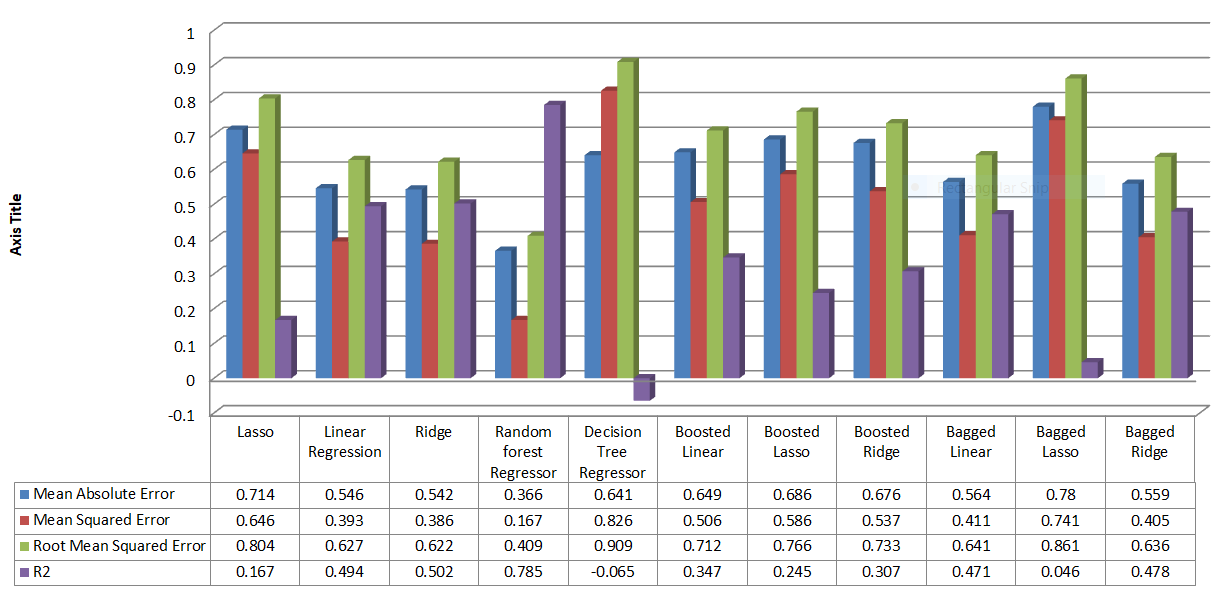


**COMPARISION OF TRAINING AND TESTING TIME**
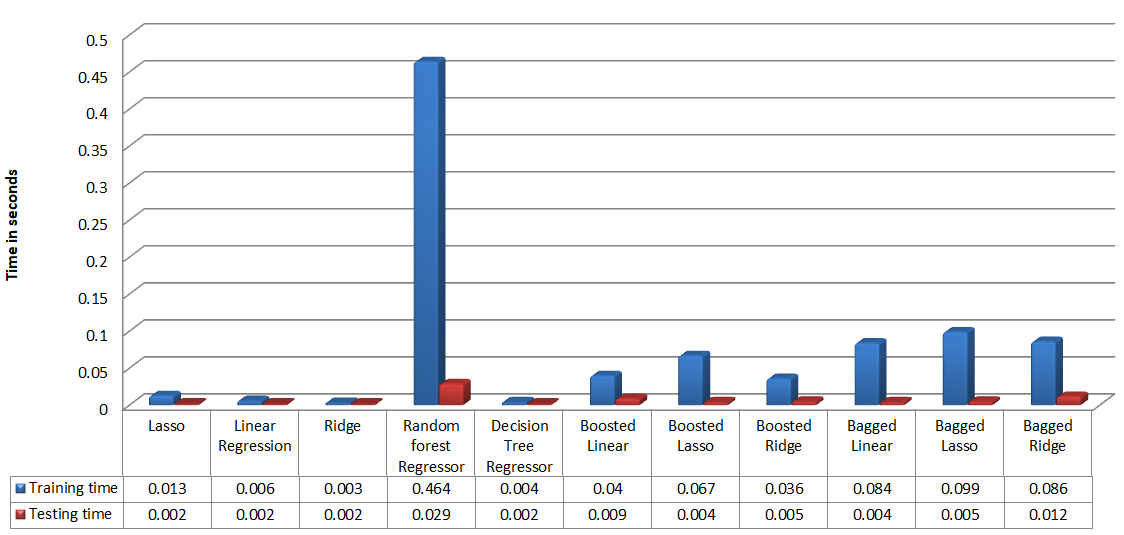

**PREDICTIONS FOR STUDENTS WHOSE CGPA IS GREATER THAN 7.5 IN ALL SEMESTERS**

In [ ]:
df = data[(data['cg1']>=7.5) & (data['cg2']>=7.5) & (data['cg3']>=7.5) & (data['cg4']>=7.5) & (data['cg5']>=7.5) ]
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(81, 7)

In [ ]:
df

usn gender   cg1    cg2   cg3   cg4   cg5
0    1GA20CS002      M  8.33   8.84  7.63  7.58  7.96
3    1GA20CS005      M  9.43  10.00  9.50  9.29  9.35
7    1GA20CS009      M  8.29   8.84  8.25  8.46  8.78
9    1GA20CS011      F  8.76   9.05  7.88  8.92  9.17
11   1GA20CS013      M  7.93   8.11  8.00  8.04  8.48
..          ...    ...   ...    ...   ...   ...   ...
155  1GA20CS164      F  8.33   8.63  8.17  8.63  8.91
159  1GA20CS168      M  9.19   9.84  8.50  9.54  9.09
160  1GA20CS169      M  8.90   9.58  9.08  8.79  9.17
161  1GA20CS170      F  8.20   8.37  8.21  8.17  9.13
164  1GA20CS173      F  9.43   9.63  9.13  9.42  9.04

[81 rows x 7 columns]

In [ ]:
X = data.drop(['usn','gender','cg5'],axis=1)
y = data['cg5']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

In [ ]:
# importing Various regression algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

In [ ]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [ ]:
for model, name in zip([Las,LinR,Rid,Rfc,Dtc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid],
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    startr=time.time()
    model.fit(X_train,y_train)
    stopr=time.time()
    startt=time.time()
    predictions = model.predict(X_test)
    stopt=time.time()
    print(name)
    absolute=mean_absolute_error(y_test, predictions)
    squared=mean_squared_error(y_test, predictions)
    root=np.sqrt(mean_squared_error(y_test, predictions))
    r2=r2_score(y_test,predictions )
    train=stopr - startr
    test=stopt - startt
    print('Mean Absolute Error:', f"{absolute:.3f}")
    print('Mean Squared Error:',f"{squared:.3f}" )
    print('Root Mean Squared Error:', f"{root:.3f}")
    print('R2 : ',f"{r2:.3f}")
    print("Training time:" ,f"{train:.3f}")
    print("Testing time:" ,f"{test:.3f}")
    print()

Lasso
Mean Absolute Error: 0.714
Mean Squared Error: 0.646
Root Mean Squared Error: 0.804
R2 :  0.167
Training time: 0.006
Testing time: 0.002

Linear Regression
Mean Absolute Error: 0.546
Mean Squared Error: 0.393
Root Mean Squared Error: 0.627
R2 :  0.494
Training time: 0.003
Testing time: 0.001

Ridge
Mean Absolute Error: 0.542
Mean Squared Error: 0.386
Root Mean Squared Error: 0.622
R2 :  0.502
Training time: 0.002
Testing time: 0.001

Random forest Regressor
Mean Absolute Error: 0.366
Mean Squared Error: 0.167
Root Mean Squared Error: 0.409
R2 :  0.785
Training time: 0.160
Testing time: 0.006

Decision Tree Regressor
Mean Absolute Error: 0.641
Mean Squared Error: 0.826
Root Mean Squared Error: 0.909
R2 :  -0.065
Training time: 0.006
Testing time: 0.001

Boosted Linear
Mean Absolute Error: 0.649
Mean Squared Error: 0.506
Root Mean Squared Error: 0.712
R2 :  0.347
Training time: 0.028
Testing time: 0.002

Boosted Lasso
Mean Absolute Error: 0.686
Mean Squared Error: 0.586
Root Mean S

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

**COMPARITIVE ANALYSIS**
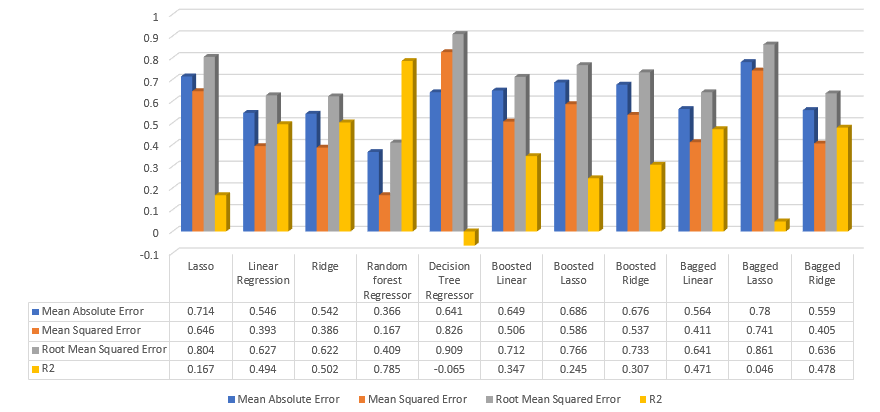

**COMPARISION OF TRAINING AND TESTING TIME**
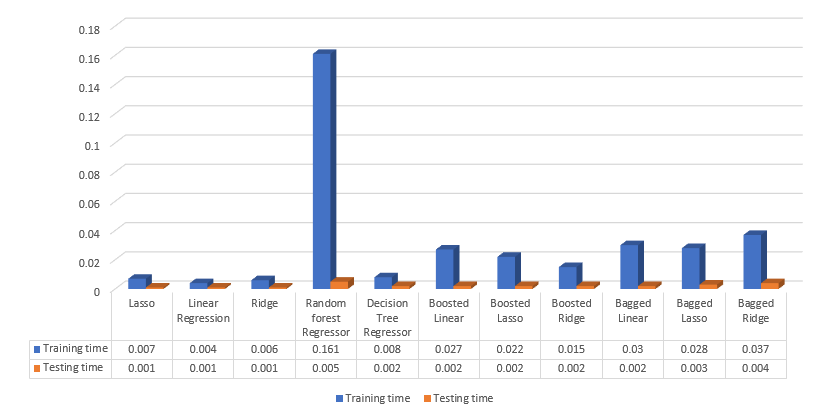

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=7da346690e9138b191efa867b72adf2d335278ab03334078369bef4421c9ce7a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['cg5'], verbose=True, mode='regression')

In [ ]:
j = 5
exp = explainer.explain_instance(X_test.values[j], model.predict, num_features=7)

Intercept 7.974930552396193
Prediction_local [8.25126581]
Right: 8.056077044183922


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('6.73 < cg1 <= 7.95', 0.16984946416045538),
 ('7.33 < cg4 <= 8.38', 0.0925894329940222),
 ('7.47 < cg2 <= 8.63', 0.08896973529627401),
 ('7.88 < cg3 <= 8.63', -0.07507337048848838)]

In [ ]:
# Choose the 8th instance and use it to predict the results
j = 8
exp = explainer.explain_instance(X_test.values[j], model.predict, num_features=6)
# Show the predictions
exp.show_in_notebook(show_table=True)
exp.as_list()

Intercept 7.713782194091081
Prediction_local [8.94717895]
Right: 8.29666936877237


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


[('cg1 <= 6.73', 1.1292932844510055),
 ('7.33 < cg4 <= 8.38', 0.048949826674473444),
 ('7.47 < cg2 <= 8.63', 0.043674580254349026),
 ('cg3 <= 7.08', 0.011479066671791537)]

The explanation shows the contribution of each feature to the model's prediction for the data point at index j (which is 5 in this case). The exp.as_list() output indicates the most important features and their contributions:

The feature 'cg1' has a positive contribution of approximately 0.17. This means that an increase in the value of 'cg1' leads to a higher predicted value of the target variable 'cg5'.

The feature 'cg4' has a positive contribution of approximately 0.09. An increase in the value of 'cg4' leads to a higher predicted value of 'cg5'.

The feature 'cg2' has a positive contribution of approximately 0.09 as well.

The feature 'cg3' has a negative contribution of approximately -0.08. This means that an increase in the value of 'cg3' leads to a lower predicted value of 'cg5'.

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
feat=data.drop(['usn','gender','cg5'],axis=1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feat.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

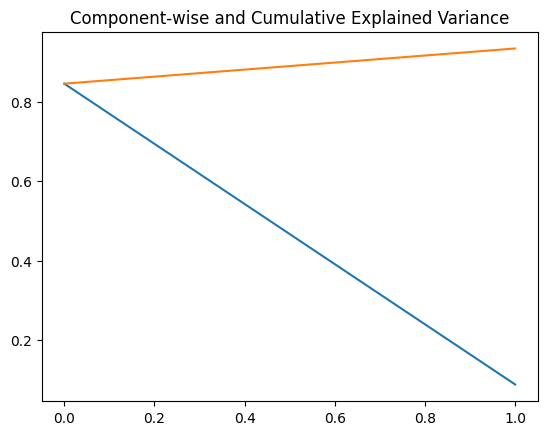

In [ ]:
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

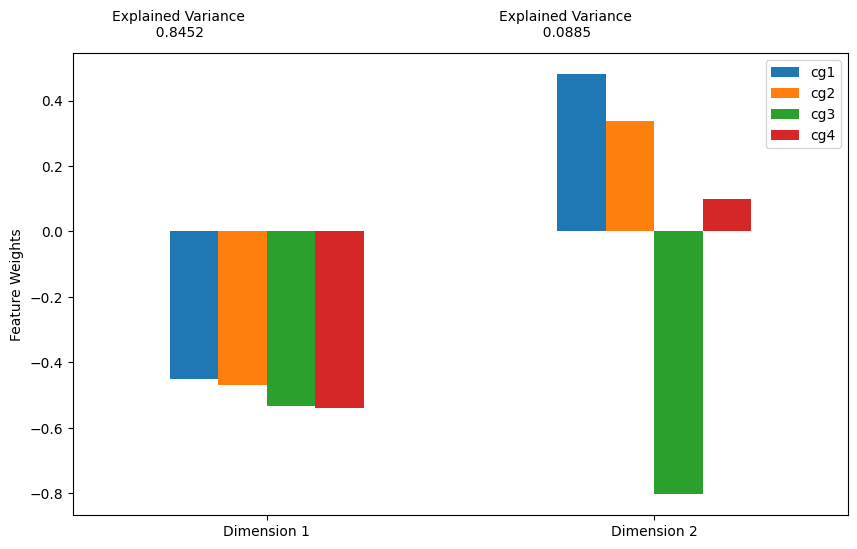

In [ ]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (10,6))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(feat, pca)

The pca_results function is a useful tool for understanding the impact of different features on the principal components obtained from the PCA. The bar plot visually represents how much each feature contributes to each dimension (component). The longer the bar, the more important the corresponding feature is for that component. Additionally, the displayed explained variance ratios give insights into how much of the total variance in the data is explained by each component.

This information is crucial for dimensionality reduction using PCA and helps us understand which features are most relevant in reducing the data's dimensionality while preserving important information. The results help in feature selection or feature engineering tasks and can lead to a better understanding of the underlying structure of the data.